# over sampling & under sampling

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [98]:
data=pd.read_csv('data/heart_failure_clinical_records_dataset.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### Data Preprocessing

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [101]:
data.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [102]:
data.duplicated().sum()

0

In [103]:
data.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

# Correlation Analysis

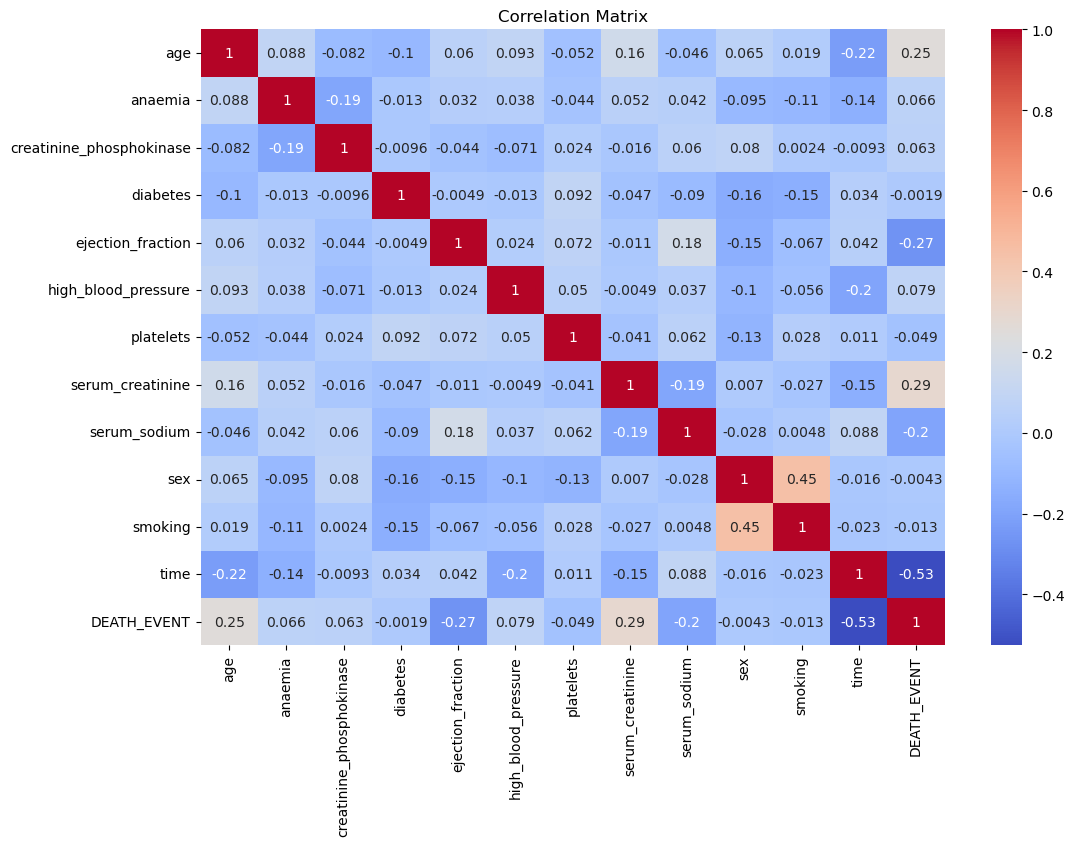

In [105]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

### Data visualization

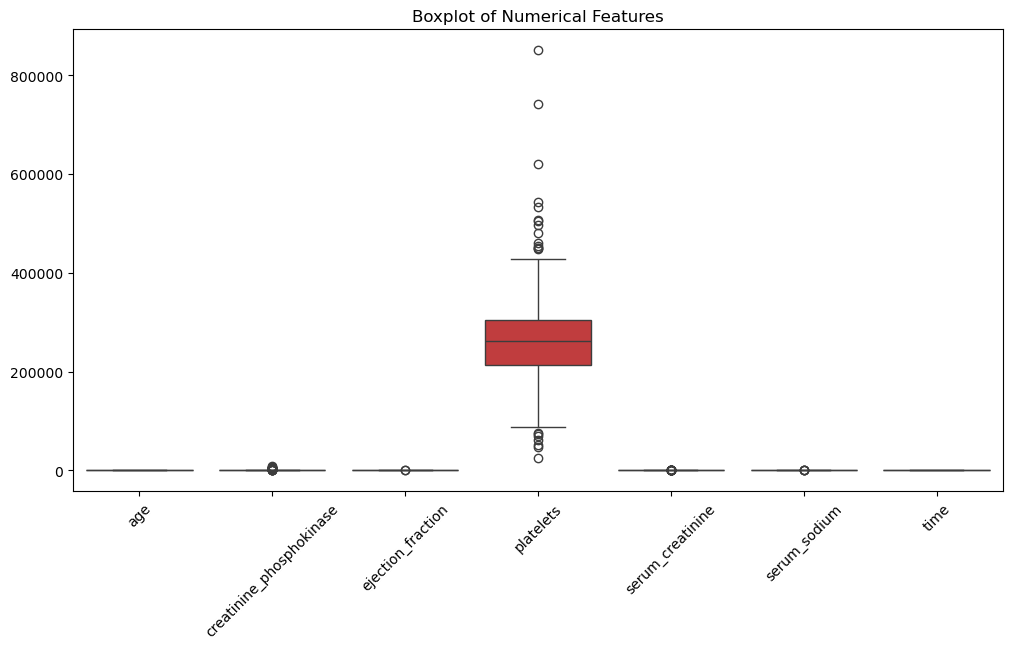

In [107]:
# Boxplot to visualize distributions and detect outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[["age", "creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium", "time"]])
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.show()

### Label Encoding

In [109]:
# Encoding categorical features
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])  # Male = 1, Female = 0
data['diabetes'] = le.fit_transform(data['diabetes'])  # 0 for no, 1 for yes

# Alternatively, for binary target column 'DEATH_EVENT':
data['DEATH_EVENT'] = le.fit_transform(data['DEATH_EVENT'])  # 0 for no, 1 for yes

### spliting X Features and Y target variable

In [111]:
X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']

### Scaling - Standardize the features

In [113]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Split the data into training and testing sets

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic regression

In [117]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\drnim\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Predictions

In [119]:
y_pred = model.predict(X_test)

### Model Evaluation

In [121]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred)*100,"%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 81.66666666666667 %
Confusion Matrix:
 [[34  1]
 [10 15]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.97      0.86        35
           1       0.94      0.60      0.73        25

    accuracy                           0.82        60
   macro avg       0.86      0.79      0.80        60
weighted avg       0.84      0.82      0.81        60



### Over Sampling

In [123]:
data["DEATH_EVENT"].value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

In [124]:
from imblearn.over_sampling import SMOTE
over=SMOTE(random_state=2)
X_os,y_os=over.fit_resample(X_scaled,y)

### after over sampling

In [126]:
y_os.value_counts()

DEATH_EVENT
1    203
0    203
Name: count, dtype: int64

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X_os, y_os, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred)*100,"%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 85.36585365853658 %
Confusion Matrix:
 [[35  6]
 [ 6 35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85        41
           1       0.85      0.85      0.85        41

    accuracy                           0.85        82
   macro avg       0.85      0.85      0.85        82
weighted avg       0.85      0.85      0.85        82



### Under Sampling

In [129]:
data["DEATH_EVENT"].value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

In [130]:
from imblearn.under_sampling import RandomUnderSampler
under= RandomUnderSampler(random_state=2)
X_us,y_us=under.fit_resample(X_scaled,y)

### After under sampling

In [132]:
y_us.value_counts()

DEATH_EVENT
0    96
1    96
Name: count, dtype: int64

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X_us, y_us, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred)*100,"%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 87.17948717948718 %
Confusion Matrix:
 [[14  4]
 [ 1 20]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.78      0.85        18
           1       0.83      0.95      0.89        21

    accuracy                           0.87        39
   macro avg       0.88      0.87      0.87        39
weighted avg       0.88      0.87      0.87        39



In [134]:
#END